# Regression Assignment

## Data Preparation

In [1]:
#Importing data, creating dataframe and checking its shape
import pandas as pd
df = pd.read_csv('train2.csv')
print(df.shape)
df.head()

(10427, 15)


,Unnamed: 0,dteday,hr,holiday,weekday,workingday,season_t,weather,temperature,s_temp,humidity,winds,n_employee,exp_employee,occupancy
0,0,2011-05-19,1,0,4,1,summer,Clear,20.50,24.240,94,0.0,2.67,9.29,6
1,1,2012-08-19,18,0,0,0,fall,Cloudy,26.24,29.545,78,7.0,2.67,3.57,377
2,2,2011-09-24,8,0,6,0,winter,Cloudy,23.78,27.275,90,6.0,2.67,28.00,121
3,3,2012-11-05,4,0,1,1,winter,Cloudy,12.30,14.395,52,17.0,2.67,4.57,16
4,4,2011-11-12,0,0,6,0,winter,Clear,9.84,12.120,60,9.0,1.67,7.57,64


In [2]:
#Checking attributes characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10427 entries, 0 to 10426
Data columns (total 15 columns):
Unnamed: 0      10427 non-null int64
dteday          10427 non-null object
hr              10427 non-null int64
holiday         10427 non-null int64
weekday         10427 non-null int64
workingday      10427 non-null int64
season_t        10427 non-null object
weather         10427 non-null object
temperature     10427 non-null float64
s_temp          10427 non-null float64
humidity        10427 non-null int64
winds           10427 non-null float64
n_employee      10427 non-null float64
exp_employee    10427 non-null float64
occupancy       10427 non-null int64
dtypes: float64(5), int64(7), object(3)
memory usage: 1.2+ MB


In [3]:
#Looking for NA values
df.isna().sum()

#There are no NA Values

Unnamed: 0      0
dteday          0
hr              0
holiday         0
weekday         0
workingday      0
season_t        0
weather         0
temperature     0
s_temp          0
humidity        0
winds           0
n_employee      0
exp_employee    0
occupancy       0
dtype: int64

In [4]:
library = df.copy()
library = library.drop(columns='Unnamed: 0')
print(library.shape)
library.head()

(10427, 14)


,dteday,hr,holiday,weekday,workingday,season_t,weather,temperature,s_temp,humidity,winds,n_employee,exp_employee,occupancy
0,2011-05-19,1,0,4,1,summer,Clear,20.50,24.240,94,0.0,2.67,9.29,6
1,2012-08-19,18,0,0,0,fall,Cloudy,26.24,29.545,78,7.0,2.67,3.57,377
2,2011-09-24,8,0,6,0,winter,Cloudy,23.78,27.275,90,6.0,2.67,28.00,121
3,2012-11-05,4,0,1,1,winter,Cloudy,12.30,14.395,52,17.0,2.67,4.57,16
4,2011-11-12,0,0,6,0,winter,Clear,9.84,12.120,60,9.0,1.67,7.57,64


In [5]:
#converting dateday from strings to datetime format 
library['dteday'] = pd.to_datetime(library['dteday'], format='%Y-%m-%d')
library.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10427 entries, 0 to 10426
Data columns (total 14 columns):
dteday          10427 non-null datetime64[ns]
hr              10427 non-null int64
holiday         10427 non-null int64
weekday         10427 non-null int64
workingday      10427 non-null int64
season_t        10427 non-null object
weather         10427 non-null object
temperature     10427 non-null float64
s_temp          10427 non-null float64
humidity        10427 non-null int64
winds           10427 non-null float64
n_employee      10427 non-null float64
exp_employee    10427 non-null float64
occupancy       10427 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#converting dateday from strings to datetime format 
#library['dteday'] = pd.to_numeric(library['dteday'], downcast='integer')
import datetime as dt
library['dteday']=library['dteday'].map(dt.datetime.toordinal)
library.head()

,dteday,hr,holiday,weekday,workingday,season_t,weather,temperature,s_temp,humidity,winds,n_employee,exp_employee,occupancy
0,734276,1,0,4,1,summer,Clear,20.50,24.240,94,0.0,2.67,9.29,6
1,734734,18,0,0,0,fall,Cloudy,26.24,29.545,78,7.0,2.67,3.57,377
2,734404,8,0,6,0,winter,Cloudy,23.78,27.275,90,6.0,2.67,28.00,121
3,734812,4,0,1,1,winter,Cloudy,12.30,14.395,52,17.0,2.67,4.57,16
4,734453,0,0,6,0,winter,Clear,9.84,12.120,60,9.0,1.67,7.57,64


In [7]:
#Creating dummy variables for season_t and weather
dummy_season_t = pd.get_dummies(library['season_t'], drop_first=True)
dummy_weather = pd.get_dummies(library['weather'], drop_first=True)

#Creating a new dataframe with the dummy variables
library1 = pd.concat([library,dummy_season_t, dummy_weather], axis = 1)

#Eliminate categorical attributes
library1 = library1.drop(columns = ['season_t', 'weather'])

print(library1.shape)
library1.head()

(10427, 18)


,dteday,hr,holiday,weekday,workingday,temperature,s_temp,humidity,winds,n_employee,exp_employee,occupancy,spring,summer,winter,Cloudy,LightRain,Snow
0,734276,1,0,4,1,20.50,24.240,94,0.0,2.67,9.29,6,0,1,0,0,0,0
1,734734,18,0,0,0,26.24,29.545,78,7.0,2.67,3.57,377,0,0,0,1,0,0
2,734404,8,0,6,0,23.78,27.275,90,6.0,2.67,28.00,121,0,0,1,1,0,0
3,734812,4,0,1,1,12.30,14.395,52,17.0,2.67,4.57,16,0,0,1,1,0,0
4,734453,0,0,6,0,9.84,12.120,60,9.0,1.67,7.57,64,0,0,1,0,0,0


In [8]:
#checking for null values
library1.isnull().any()

dteday          False
hr              False
holiday         False
weekday         False
workingday      False
temperature     False
s_temp          False
humidity        False
winds           False
n_employee      False
exp_employee    False
occupancy       False
spring          False
summer          False
winter          False
Cloudy          False
LightRain       False
Snow            False
dtype: bool

In [9]:
#Checking for na values
library1.isna().any()

dteday          False
hr              False
holiday         False
weekday         False
workingday      False
temperature     False
s_temp          False
humidity        False
winds           False
n_employee      False
exp_employee    False
occupancy       False
spring          False
summer          False
winter          False
Cloudy          False
LightRain       False
Snow            False
dtype: bool

In [10]:
#Creating X,Y training and test sets

X = library1.copy()
X = X.drop(columns='occupancy')

y = library1['occupancy'].copy()
y = pd.DataFrame(y)

#X.head()
#y.head()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y,
                                                    test_size = 0.3,
                                                    random_state = 1234)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7298, 17)
(3129, 17)
(7298, 1)
(3129, 1)


## Exploratory data analysis

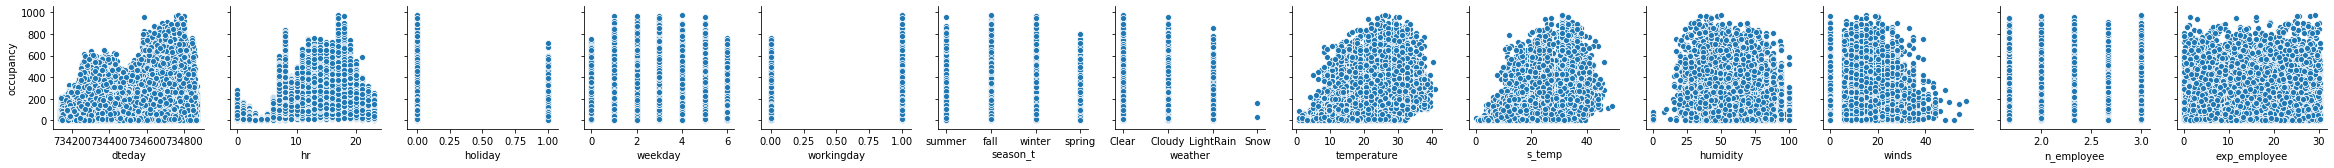

In [12]:
#From library dataframe (original one with adjusted dteday format)

# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(library, x_vars=['dteday', 'hr', 'holiday', 'weekday', 'workingday', 'season_t', 'weather', 'temperature', 's_temp', 'humidity', 'winds', 'n_employee', 'exp_employee'], y_vars='occupancy')

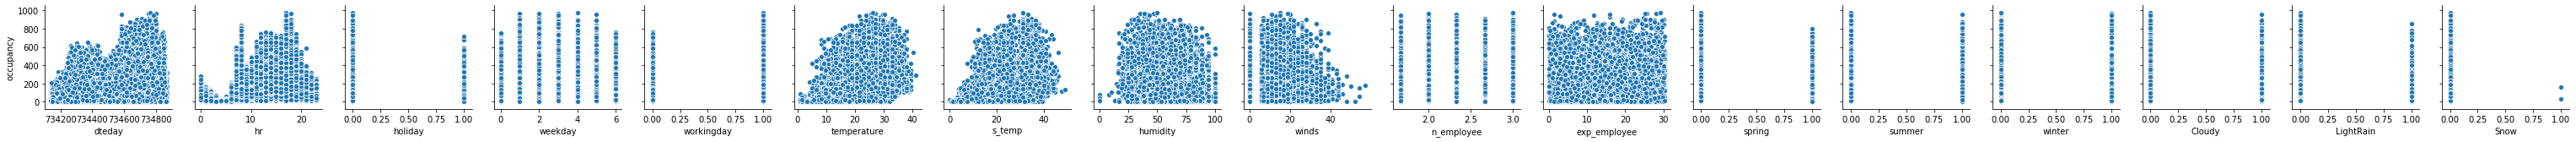

In [13]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(library1, x_vars=['dteday', 'hr', 'holiday', 'weekday', 'workingday', 'temperature', 's_temp', 'humidity', 'winds', 'n_employee', 'exp_employee', 'spring', 'summer', 'winter', 'Cloudy', 'LightRain', 'Snow'], y_vars='occupancy')

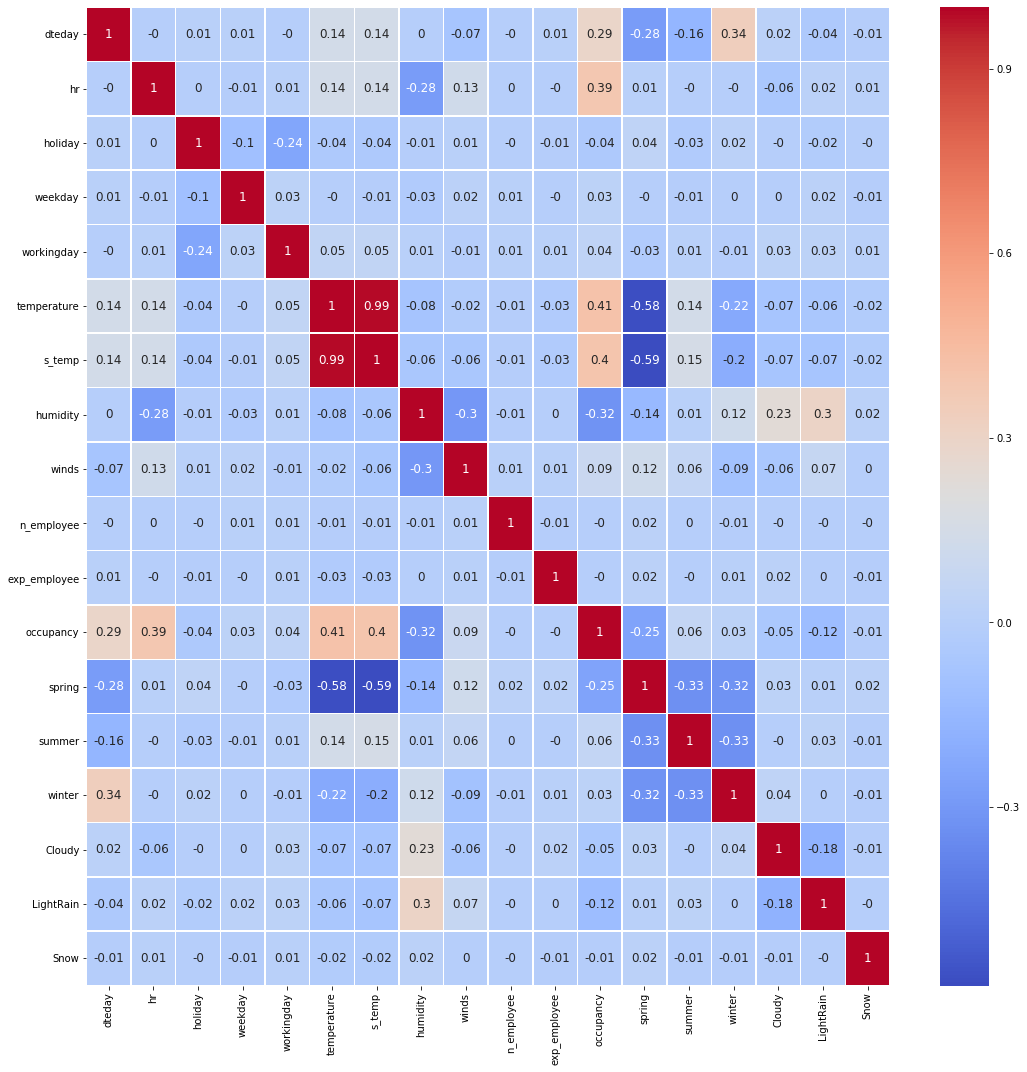

In [14]:
#Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (18,18))
sns.heatmap(data = library1.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={'size':12})
plt.show()

### PCA

In [15]:
#Applying PCA for reducing the number of attributes
from sklearn.preprocessing import StandardScaler
columns = X.columns
scaler = StandardScaler(copy=False)
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
X_scaled.columns = columns
X_scaled.head()

X_scaled_train, X_scaled_test, y_train, y_test = train_test_split (X_scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 1234)

print(X_scaled_train.shape)
print(X_scaled_test.shape)


from sklearn.decomposition import PCA
pca = PCA(n_components=11)#n_components=11
pca.fit(X_scaled)

X_pca = pd.DataFrame(pca.transform(X_scaled))
X_pca.columns = ['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']
X_pca.head()

(7298, 17)
(3129, 17)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.469071,-0.590581,2.912244,-0.010096,-0.332607,0.798465,-0.995344,-0.216129,0.205363,0.291133,1.315532
1,-1.135766,-0.957818,-0.180694,1.430780,-0.945986,1.297572,-0.155488,0.367221,-0.879666,-0.782176,-1.525257
2,-0.174428,-2.307600,0.310660,0.354619,-0.936523,-1.014904,-0.802347,0.689187,1.435332,1.102969,-1.224205
3,1.135266,-2.026150,-1.171961,-0.414454,-0.917819,0.676766,-0.558893,0.503842,-0.278003,-2.125674,0.566235
4,1.709874,-1.655193,-0.522125,0.327693,0.342595,-0.158398,-0.426685,-2.312816,1.613950,0.044957,1.378250


In [16]:
#eigenvalues explaining the variance of Z

eigenv = pd.DataFrame(pca.explained_variance_).transpose()
eigenv

,0,1,2,3,4,5,6,7,8,9,10
0,2.627011,1.798257,1.482849,1.266852,1.212275,1.02561,1.007991,0.986814,0.975017,0.947757,0.906929


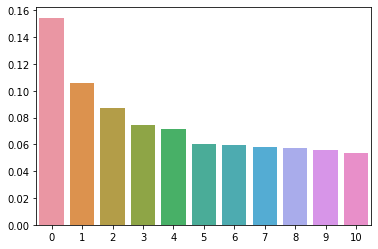

In [17]:
#Cumulative explained variance - sum eigenv
explained_var = pd.DataFrame(pca.explained_variance_ratio_).transpose()

%matplotlib inline
#barplot for explained variance
import seaborn as sns
sns.barplot(data=explained_var)

In [18]:
#Cumulative explained variance - sum eigenv
import numpy as np
cum_explained_var = np.cumsum(pca.explained_variance_ratio_)
cum_var = pd.DataFrame(cum_explained_var).transpose()
cum_var

,0,1,2,3,4,5,6,7,8,9,10
0,0.154515,0.260285,0.347503,0.422017,0.49332,0.553644,0.612932,0.670974,0.728323,0.784068,0.837412


Text(0, 0.5, 'Cum explained var')

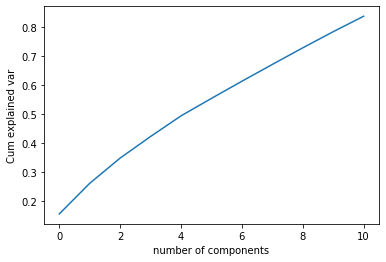

In [19]:
#Choosing n for PCA
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components') 
plt.ylabel('Cum explained var')

In [20]:
library2 = pd.concat([X_pca, y], axis=1, sort=False)
library2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,occupancy
0,-0.469071,-0.590581,2.912244,-0.010096,-0.332607,0.798465,-0.995344,-0.216129,0.205363,0.291133,1.315532,6
1,-1.135766,-0.957818,-0.180694,1.430780,-0.945986,1.297572,-0.155488,0.367221,-0.879666,-0.782176,-1.525257,377
2,-0.174428,-2.307600,0.310660,0.354619,-0.936523,-1.014904,-0.802347,0.689187,1.435332,1.102969,-1.224205,121
3,1.135266,-2.026150,-1.171961,-0.414454,-0.917819,0.676766,-0.558893,0.503842,-0.278003,-2.125674,0.566235,16
4,1.709874,-1.655193,-0.522125,0.327693,0.342595,-0.158398,-0.426685,-2.312816,1.613950,0.044957,1.378250,64


##### Then we select 11 first variables PCA

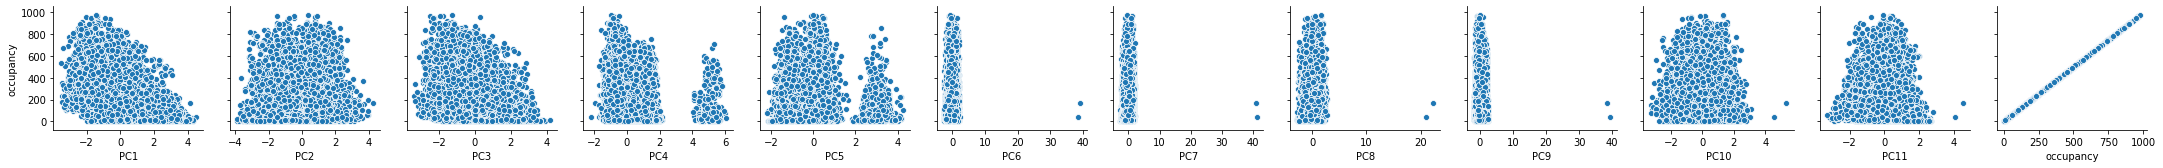

In [21]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(library2, x_vars=library2.columns, y_vars='occupancy')

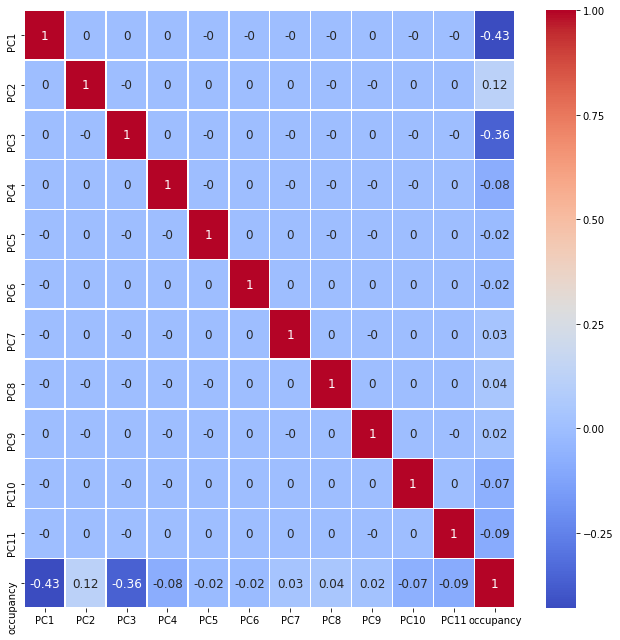

In [22]:
#Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (11,11))
sns.heatmap(data = library2.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={'size':12})
plt.show()

In [23]:
#Scale and select train/test set
from sklearn.preprocessing import StandardScaler
X1 = X_pca.copy()
X1 = X1.drop(columns=['PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
columns = X1.columns
scaler = StandardScaler(copy=False)
scaler.fit(X1)
X1_scaled = pd.DataFrame(scaler.transform(X1))
#X1_scaled = X1
X1_scaled.columns = columns
X1_scaled.head()

X1_scaled_train, X1_scaled_test, y_train, y_test = train_test_split (X1_scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 1234)

print(X1_scaled_train.shape)
print(X1_scaled_test.shape)

(7298, 3)
(3129, 3)


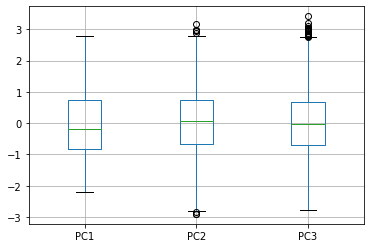

In [24]:
X1_scaled.boxplot()

## Regression Models

### Best Model: Support Vector regression

In [25]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.svm import SVR
import numpy as np

regressor = SVR()
parameters = {'C': [10,100,1000],
             'epsilon': [0.1,1,10],
             'gamma':['auto','scale'],
             'kernel': ['rbf'],
             'degree': [2,3,4,5]
             }

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs2 = GridSearchCV(regressor, parameters, cv=3, verbose = 10) #with no params it reduces to a CV

gs2 = gs2.fit(X1_scaled_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs2.best_score_, gs2.best_params_))
means = gs2.cv_results_['mean_test_score']
stds = gs2.cv_results_['std_test_score']
params = gs2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs2.score(X1_scaled_test, y_test)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] C=10, degree=2, epsilon=0.1, gamma=auto, kernel=rbf .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, score=0.325, total=   0.9s
[CV] C=10, degree=2, epsilon=0.1, gamma=auto, kernel=rbf .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=2, epsilon=0.1, gamma=auto, kernel=rbf .............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s
C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, score=0.340, total=   0.9s
[CV] C=10, degree=2, epsilon=0.1, gamma=scale, kernel=rbf ............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s
C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, score=0.325, total=   0.9s
[CV] C=10, degree=2, epsilon=0.1, gamma=scale, kernel=rbf ............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s remaining:    0.0s
C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=2, epsilon=0.1, gamma=scale, kernel=rbf ............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s remaining:    0.0s
C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, score=0.340, total=   0.9s
[CV] C=10, degree=2, epsilon=1, gamma=auto, kernel=rbf ...............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.2s remaining:    0.0s
C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=1, gamma=auto, kernel=rbf, score=0.325, total=   0.9s
[CV] C=10, degree=2, epsilon=1, gamma=auto, kernel=rbf ...............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.0s remaining:    0.0s
C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=1, gamma=auto, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=2, epsilon=1, gamma=auto, kernel=rbf ...............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.9s remaining:    0.0s
C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=1, gamma=auto, kernel=rbf, score=0.339, total=   0.9s
[CV] C=10, degree=2, epsilon=1, gamma=scale, kernel=rbf ..............


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.8s remaining:    0.0s
C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=1, gamma=scale, kernel=rbf, score=0.325, total=   0.9s
[CV] C=10, degree=2, epsilon=1, gamma=scale, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=1, gamma=scale, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=2, epsilon=1, gamma=scale, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=1, gamma=scale, kernel=rbf, score=0.339, total=   0.9s
[CV] C=10, degree=2, epsilon=10, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=10, gamma=auto, kernel=rbf, score=0.326, total=   0.8s
[CV] C=10, degree=2, epsilon=10, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=10, gamma=auto, kernel=rbf, score=0.296, total=   0.8s
[CV] C=10, degree=2, epsilon=10, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=10, gamma=auto, kernel=rbf, score=0.338, total=   0.8s
[CV] C=10, degree=2, epsilon=10, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=10, gamma=scale, kernel=rbf, score=0.326, total=   0.8s
[CV] C=10, degree=2, epsilon=10, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=10, gamma=scale, kernel=rbf, score=0.296, total=   0.8s
[CV] C=10, degree=2, epsilon=10, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=2, epsilon=10, gamma=scale, kernel=rbf, score=0.338, total=   0.8s
[CV] C=10, degree=3, epsilon=0.1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, score=0.325, total=   0.9s
[CV] C=10, degree=3, epsilon=0.1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=3, epsilon=0.1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, score=0.340, total=   0.9s
[CV] C=10, degree=3, epsilon=0.1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, score=0.325, total=   0.9s
[CV] C=10, degree=3, epsilon=0.1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=3, epsilon=0.1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, score=0.340, total=   0.9s
[CV] C=10, degree=3, epsilon=1, gamma=auto, kernel=rbf ...............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=1, gamma=auto, kernel=rbf, score=0.325, total=   0.9s
[CV] C=10, degree=3, epsilon=1, gamma=auto, kernel=rbf ...............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=1, gamma=auto, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=3, epsilon=1, gamma=auto, kernel=rbf ...............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=1, gamma=auto, kernel=rbf, score=0.339, total=   0.9s
[CV] C=10, degree=3, epsilon=1, gamma=scale, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=1, gamma=scale, kernel=rbf, score=0.325, total=   0.9s
[CV] C=10, degree=3, epsilon=1, gamma=scale, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=1, gamma=scale, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=3, epsilon=1, gamma=scale, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=1, gamma=scale, kernel=rbf, score=0.339, total=   0.9s
[CV] C=10, degree=3, epsilon=10, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=10, gamma=auto, kernel=rbf, score=0.326, total=   0.8s
[CV] C=10, degree=3, epsilon=10, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=10, gamma=auto, kernel=rbf, score=0.296, total=   0.8s
[CV] C=10, degree=3, epsilon=10, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=10, gamma=auto, kernel=rbf, score=0.338, total=   0.8s
[CV] C=10, degree=3, epsilon=10, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=10, gamma=scale, kernel=rbf, score=0.326, total=   0.8s
[CV] C=10, degree=3, epsilon=10, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=10, gamma=scale, kernel=rbf, score=0.296, total=   0.8s
[CV] C=10, degree=3, epsilon=10, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=3, epsilon=10, gamma=scale, kernel=rbf, score=0.338, total=   0.8s
[CV] C=10, degree=4, epsilon=0.1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=0.1, gamma=auto, kernel=rbf, score=0.325, total=   0.9s
[CV] C=10, degree=4, epsilon=0.1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=0.1, gamma=auto, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=4, epsilon=0.1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=0.1, gamma=auto, kernel=rbf, score=0.340, total=   0.9s
[CV] C=10, degree=4, epsilon=0.1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=0.1, gamma=scale, kernel=rbf, score=0.325, total=   0.9s
[CV] C=10, degree=4, epsilon=0.1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=0.1, gamma=scale, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=4, epsilon=0.1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=0.1, gamma=scale, kernel=rbf, score=0.340, total=   0.9s
[CV] C=10, degree=4, epsilon=1, gamma=auto, kernel=rbf ...............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=1, gamma=auto, kernel=rbf, score=0.325, total=   0.9s
[CV] C=10, degree=4, epsilon=1, gamma=auto, kernel=rbf ...............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=1, gamma=auto, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=4, epsilon=1, gamma=auto, kernel=rbf ...............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=1, gamma=auto, kernel=rbf, score=0.339, total=   0.9s
[CV] C=10, degree=4, epsilon=1, gamma=scale, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=1, gamma=scale, kernel=rbf, score=0.325, total=   1.0s
[CV] C=10, degree=4, epsilon=1, gamma=scale, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=1, gamma=scale, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=4, epsilon=1, gamma=scale, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=1, gamma=scale, kernel=rbf, score=0.339, total=   0.9s
[CV] C=10, degree=4, epsilon=10, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=10, gamma=auto, kernel=rbf, score=0.326, total=   0.8s
[CV] C=10, degree=4, epsilon=10, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=10, gamma=auto, kernel=rbf, score=0.296, total=   0.9s
[CV] C=10, degree=4, epsilon=10, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=10, gamma=auto, kernel=rbf, score=0.338, total=   0.8s
[CV] C=10, degree=4, epsilon=10, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=10, gamma=scale, kernel=rbf, score=0.326, total=   0.8s
[CV] C=10, degree=4, epsilon=10, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=10, gamma=scale, kernel=rbf, score=0.296, total=   0.8s
[CV] C=10, degree=4, epsilon=10, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=4, epsilon=10, gamma=scale, kernel=rbf, score=0.338, total=   0.8s
[CV] C=10, degree=5, epsilon=0.1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=0.1, gamma=auto, kernel=rbf, score=0.325, total=   1.0s
[CV] C=10, degree=5, epsilon=0.1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=0.1, gamma=auto, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=5, epsilon=0.1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=0.1, gamma=auto, kernel=rbf, score=0.340, total=   0.9s
[CV] C=10, degree=5, epsilon=0.1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=0.1, gamma=scale, kernel=rbf, score=0.325, total=   0.9s
[CV] C=10, degree=5, epsilon=0.1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=0.1, gamma=scale, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=5, epsilon=0.1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=0.1, gamma=scale, kernel=rbf, score=0.340, total=   0.9s
[CV] C=10, degree=5, epsilon=1, gamma=auto, kernel=rbf ...............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=1, gamma=auto, kernel=rbf, score=0.325, total=   0.9s
[CV] C=10, degree=5, epsilon=1, gamma=auto, kernel=rbf ...............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=1, gamma=auto, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=5, epsilon=1, gamma=auto, kernel=rbf ...............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=1, gamma=auto, kernel=rbf, score=0.339, total=   0.9s
[CV] C=10, degree=5, epsilon=1, gamma=scale, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=1, gamma=scale, kernel=rbf, score=0.325, total=   0.9s
[CV] C=10, degree=5, epsilon=1, gamma=scale, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=1, gamma=scale, kernel=rbf, score=0.294, total=   0.9s
[CV] C=10, degree=5, epsilon=1, gamma=scale, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=1, gamma=scale, kernel=rbf, score=0.339, total=   0.9s
[CV] C=10, degree=5, epsilon=10, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=10, gamma=auto, kernel=rbf, score=0.326, total=   0.8s
[CV] C=10, degree=5, epsilon=10, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=10, gamma=auto, kernel=rbf, score=0.296, total=   0.8s
[CV] C=10, degree=5, epsilon=10, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=10, gamma=auto, kernel=rbf, score=0.338, total=   0.8s
[CV] C=10, degree=5, epsilon=10, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=10, gamma=scale, kernel=rbf, score=0.326, total=   0.9s
[CV] C=10, degree=5, epsilon=10, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=10, gamma=scale, kernel=rbf, score=0.296, total=   0.8s
[CV] C=10, degree=5, epsilon=10, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, degree=5, epsilon=10, gamma=scale, kernel=rbf, score=0.338, total=   0.8s
[CV] C=100, degree=2, epsilon=0.1, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, score=0.338, total=   0.9s
[CV] C=100, degree=2, epsilon=0.1, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, score=0.306, total=   0.9s
[CV] C=100, degree=2, epsilon=0.1, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, score=0.352, total=   0.9s
[CV] C=100, degree=2, epsilon=0.1, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, score=0.338, total=   0.9s
[CV] C=100, degree=2, epsilon=0.1, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, score=0.306, total=   0.9s
[CV] C=100, degree=2, epsilon=0.1, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, score=0.352, total=   0.9s
[CV] C=100, degree=2, epsilon=1, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=1, gamma=auto, kernel=rbf, score=0.338, total=   0.9s
[CV] C=100, degree=2, epsilon=1, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=1, gamma=auto, kernel=rbf, score=0.307, total=   0.9s
[CV] C=100, degree=2, epsilon=1, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=1, gamma=auto, kernel=rbf, score=0.351, total=   1.0s
[CV] C=100, degree=2, epsilon=1, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=1, gamma=scale, kernel=rbf, score=0.338, total=   0.9s
[CV] C=100, degree=2, epsilon=1, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=1, gamma=scale, kernel=rbf, score=0.307, total=   0.9s
[CV] C=100, degree=2, epsilon=1, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=1, gamma=scale, kernel=rbf, score=0.351, total=   0.9s
[CV] C=100, degree=2, epsilon=10, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=10, gamma=auto, kernel=rbf, score=0.341, total=   0.9s
[CV] C=100, degree=2, epsilon=10, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=10, gamma=auto, kernel=rbf, score=0.308, total=   0.9s
[CV] C=100, degree=2, epsilon=10, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=10, gamma=auto, kernel=rbf, score=0.352, total=   0.9s
[CV] C=100, degree=2, epsilon=10, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=10, gamma=scale, kernel=rbf, score=0.341, total=   0.9s
[CV] C=100, degree=2, epsilon=10, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=10, gamma=scale, kernel=rbf, score=0.308, total=   0.8s
[CV] C=100, degree=2, epsilon=10, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=2, epsilon=10, gamma=scale, kernel=rbf, score=0.352, total=   0.9s
[CV] C=100, degree=3, epsilon=0.1, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, score=0.338, total=   0.9s
[CV] C=100, degree=3, epsilon=0.1, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, score=0.306, total=   0.9s
[CV] C=100, degree=3, epsilon=0.1, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, score=0.352, total=   0.9s
[CV] C=100, degree=3, epsilon=0.1, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, score=0.338, total=   0.9s
[CV] C=100, degree=3, epsilon=0.1, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, score=0.306, total=   0.9s
[CV] C=100, degree=3, epsilon=0.1, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, score=0.352, total=   0.9s
[CV] C=100, degree=3, epsilon=1, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=1, gamma=auto, kernel=rbf, score=0.338, total=   0.9s
[CV] C=100, degree=3, epsilon=1, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=1, gamma=auto, kernel=rbf, score=0.307, total=   0.9s
[CV] C=100, degree=3, epsilon=1, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=1, gamma=auto, kernel=rbf, score=0.351, total=   0.9s
[CV] C=100, degree=3, epsilon=1, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=1, gamma=scale, kernel=rbf, score=0.338, total=   0.9s
[CV] C=100, degree=3, epsilon=1, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=1, gamma=scale, kernel=rbf, score=0.307, total=   0.9s
[CV] C=100, degree=3, epsilon=1, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=1, gamma=scale, kernel=rbf, score=0.351, total=   1.0s
[CV] C=100, degree=3, epsilon=10, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=10, gamma=auto, kernel=rbf, score=0.341, total=   0.9s
[CV] C=100, degree=3, epsilon=10, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=10, gamma=auto, kernel=rbf, score=0.308, total=   0.9s
[CV] C=100, degree=3, epsilon=10, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=10, gamma=auto, kernel=rbf, score=0.352, total=   0.9s
[CV] C=100, degree=3, epsilon=10, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=10, gamma=scale, kernel=rbf, score=0.341, total=   0.9s
[CV] C=100, degree=3, epsilon=10, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=10, gamma=scale, kernel=rbf, score=0.308, total=   0.8s
[CV] C=100, degree=3, epsilon=10, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=3, epsilon=10, gamma=scale, kernel=rbf, score=0.352, total=   0.9s
[CV] C=100, degree=4, epsilon=0.1, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=0.1, gamma=auto, kernel=rbf, score=0.338, total=   0.9s
[CV] C=100, degree=4, epsilon=0.1, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=0.1, gamma=auto, kernel=rbf, score=0.306, total=   0.9s
[CV] C=100, degree=4, epsilon=0.1, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=0.1, gamma=auto, kernel=rbf, score=0.352, total=   0.9s
[CV] C=100, degree=4, epsilon=0.1, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=0.1, gamma=scale, kernel=rbf, score=0.338, total=   0.9s
[CV] C=100, degree=4, epsilon=0.1, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=0.1, gamma=scale, kernel=rbf, score=0.306, total=   0.9s
[CV] C=100, degree=4, epsilon=0.1, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=0.1, gamma=scale, kernel=rbf, score=0.352, total=   0.9s
[CV] C=100, degree=4, epsilon=1, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=1, gamma=auto, kernel=rbf, score=0.338, total=   0.9s
[CV] C=100, degree=4, epsilon=1, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=1, gamma=auto, kernel=rbf, score=0.307, total=   0.9s
[CV] C=100, degree=4, epsilon=1, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=1, gamma=auto, kernel=rbf, score=0.351, total=   0.9s
[CV] C=100, degree=4, epsilon=1, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=1, gamma=scale, kernel=rbf, score=0.338, total=   0.9s
[CV] C=100, degree=4, epsilon=1, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=1, gamma=scale, kernel=rbf, score=0.307, total=   0.9s
[CV] C=100, degree=4, epsilon=1, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=1, gamma=scale, kernel=rbf, score=0.351, total=   0.9s
[CV] C=100, degree=4, epsilon=10, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=10, gamma=auto, kernel=rbf, score=0.341, total=   0.9s
[CV] C=100, degree=4, epsilon=10, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=10, gamma=auto, kernel=rbf, score=0.308, total=   0.8s
[CV] C=100, degree=4, epsilon=10, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=10, gamma=auto, kernel=rbf, score=0.352, total=   0.9s
[CV] C=100, degree=4, epsilon=10, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=10, gamma=scale, kernel=rbf, score=0.341, total=   0.9s
[CV] C=100, degree=4, epsilon=10, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=10, gamma=scale, kernel=rbf, score=0.308, total=   1.0s
[CV] C=100, degree=4, epsilon=10, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=4, epsilon=10, gamma=scale, kernel=rbf, score=0.352, total=   0.9s
[CV] C=100, degree=5, epsilon=0.1, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=0.1, gamma=auto, kernel=rbf, score=0.338, total=   0.9s
[CV] C=100, degree=5, epsilon=0.1, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=0.1, gamma=auto, kernel=rbf, score=0.306, total=   0.9s
[CV] C=100, degree=5, epsilon=0.1, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=0.1, gamma=auto, kernel=rbf, score=0.352, total=   0.9s
[CV] C=100, degree=5, epsilon=0.1, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=0.1, gamma=scale, kernel=rbf, score=0.338, total=   0.9s
[CV] C=100, degree=5, epsilon=0.1, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=0.1, gamma=scale, kernel=rbf, score=0.306, total=   0.9s
[CV] C=100, degree=5, epsilon=0.1, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=0.1, gamma=scale, kernel=rbf, score=0.352, total=   0.9s
[CV] C=100, degree=5, epsilon=1, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=1, gamma=auto, kernel=rbf, score=0.338, total=   0.9s
[CV] C=100, degree=5, epsilon=1, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=1, gamma=auto, kernel=rbf, score=0.307, total=   0.9s
[CV] C=100, degree=5, epsilon=1, gamma=auto, kernel=rbf ..............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=1, gamma=auto, kernel=rbf, score=0.351, total=   0.9s
[CV] C=100, degree=5, epsilon=1, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=1, gamma=scale, kernel=rbf, score=0.338, total=   1.0s
[CV] C=100, degree=5, epsilon=1, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=1, gamma=scale, kernel=rbf, score=0.307, total=   1.0s
[CV] C=100, degree=5, epsilon=1, gamma=scale, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=1, gamma=scale, kernel=rbf, score=0.351, total=   1.0s
[CV] C=100, degree=5, epsilon=10, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=10, gamma=auto, kernel=rbf, score=0.341, total=   0.9s
[CV] C=100, degree=5, epsilon=10, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=10, gamma=auto, kernel=rbf, score=0.308, total=   0.9s
[CV] C=100, degree=5, epsilon=10, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=10, gamma=auto, kernel=rbf, score=0.352, total=   0.8s
[CV] C=100, degree=5, epsilon=10, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=10, gamma=scale, kernel=rbf, score=0.341, total=   0.9s
[CV] C=100, degree=5, epsilon=10, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=10, gamma=scale, kernel=rbf, score=0.308, total=   0.8s
[CV] C=100, degree=5, epsilon=10, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, degree=5, epsilon=10, gamma=scale, kernel=rbf, score=0.352, total=   0.8s
[CV] C=1000, degree=2, epsilon=0.1, gamma=auto, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, score=0.339, total=   1.2s
[CV] C=1000, degree=2, epsilon=0.1, gamma=auto, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, score=0.314, total=   1.2s
[CV] C=1000, degree=2, epsilon=0.1, gamma=auto, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=0.1, gamma=auto, kernel=rbf, score=0.358, total=   1.1s
[CV] C=1000, degree=2, epsilon=0.1, gamma=scale, kernel=rbf ..........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, score=0.339, total=   1.2s
[CV] C=1000, degree=2, epsilon=0.1, gamma=scale, kernel=rbf ..........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, score=0.314, total=   1.2s
[CV] C=1000, degree=2, epsilon=0.1, gamma=scale, kernel=rbf ..........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=0.1, gamma=scale, kernel=rbf, score=0.358, total=   1.1s
[CV] C=1000, degree=2, epsilon=1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=1, gamma=auto, kernel=rbf, score=0.339, total=   1.2s
[CV] C=1000, degree=2, epsilon=1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=1, gamma=auto, kernel=rbf, score=0.314, total=   1.2s
[CV] C=1000, degree=2, epsilon=1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=1, gamma=auto, kernel=rbf, score=0.358, total=   1.2s
[CV] C=1000, degree=2, epsilon=1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=1, gamma=scale, kernel=rbf, score=0.339, total=   1.1s
[CV] C=1000, degree=2, epsilon=1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=1, gamma=scale, kernel=rbf, score=0.313, total=   1.2s
[CV] C=1000, degree=2, epsilon=1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=1, gamma=scale, kernel=rbf, score=0.358, total=   1.2s
[CV] C=1000, degree=2, epsilon=10, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=10, gamma=auto, kernel=rbf, score=0.341, total=   1.1s
[CV] C=1000, degree=2, epsilon=10, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=10, gamma=auto, kernel=rbf, score=0.316, total=   1.1s
[CV] C=1000, degree=2, epsilon=10, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=10, gamma=auto, kernel=rbf, score=0.357, total=   1.1s
[CV] C=1000, degree=2, epsilon=10, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=10, gamma=scale, kernel=rbf, score=0.341, total=   1.1s
[CV] C=1000, degree=2, epsilon=10, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=10, gamma=scale, kernel=rbf, score=0.316, total=   1.1s
[CV] C=1000, degree=2, epsilon=10, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=2, epsilon=10, gamma=scale, kernel=rbf, score=0.357, total=   1.1s
[CV] C=1000, degree=3, epsilon=0.1, gamma=auto, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, score=0.339, total=   1.1s
[CV] C=1000, degree=3, epsilon=0.1, gamma=auto, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, score=0.314, total=   1.2s
[CV] C=1000, degree=3, epsilon=0.1, gamma=auto, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=0.1, gamma=auto, kernel=rbf, score=0.358, total=   1.1s
[CV] C=1000, degree=3, epsilon=0.1, gamma=scale, kernel=rbf ..........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, score=0.339, total=   1.2s
[CV] C=1000, degree=3, epsilon=0.1, gamma=scale, kernel=rbf ..........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, score=0.314, total=   1.2s
[CV] C=1000, degree=3, epsilon=0.1, gamma=scale, kernel=rbf ..........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=0.1, gamma=scale, kernel=rbf, score=0.358, total=   1.1s
[CV] C=1000, degree=3, epsilon=1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=1, gamma=auto, kernel=rbf, score=0.339, total=   1.2s
[CV] C=1000, degree=3, epsilon=1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=1, gamma=auto, kernel=rbf, score=0.314, total=   1.2s
[CV] C=1000, degree=3, epsilon=1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=1, gamma=auto, kernel=rbf, score=0.358, total=   1.1s
[CV] C=1000, degree=3, epsilon=1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=1, gamma=scale, kernel=rbf, score=0.339, total=   1.1s
[CV] C=1000, degree=3, epsilon=1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=1, gamma=scale, kernel=rbf, score=0.313, total=   1.2s
[CV] C=1000, degree=3, epsilon=1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=1, gamma=scale, kernel=rbf, score=0.358, total=   1.3s
[CV] C=1000, degree=3, epsilon=10, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=10, gamma=auto, kernel=rbf, score=0.341, total=   1.1s
[CV] C=1000, degree=3, epsilon=10, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=10, gamma=auto, kernel=rbf, score=0.316, total=   1.1s
[CV] C=1000, degree=3, epsilon=10, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=10, gamma=auto, kernel=rbf, score=0.357, total=   1.1s
[CV] C=1000, degree=3, epsilon=10, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=10, gamma=scale, kernel=rbf, score=0.341, total=   1.1s
[CV] C=1000, degree=3, epsilon=10, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=10, gamma=scale, kernel=rbf, score=0.316, total=   1.1s
[CV] C=1000, degree=3, epsilon=10, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=3, epsilon=10, gamma=scale, kernel=rbf, score=0.357, total=   1.1s
[CV] C=1000, degree=4, epsilon=0.1, gamma=auto, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=0.1, gamma=auto, kernel=rbf, score=0.339, total=   1.1s
[CV] C=1000, degree=4, epsilon=0.1, gamma=auto, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=0.1, gamma=auto, kernel=rbf, score=0.314, total=   1.2s
[CV] C=1000, degree=4, epsilon=0.1, gamma=auto, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=0.1, gamma=auto, kernel=rbf, score=0.358, total=   1.1s
[CV] C=1000, degree=4, epsilon=0.1, gamma=scale, kernel=rbf ..........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=0.1, gamma=scale, kernel=rbf, score=0.339, total=   1.1s
[CV] C=1000, degree=4, epsilon=0.1, gamma=scale, kernel=rbf ..........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=0.1, gamma=scale, kernel=rbf, score=0.314, total=   1.2s
[CV] C=1000, degree=4, epsilon=0.1, gamma=scale, kernel=rbf ..........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=0.1, gamma=scale, kernel=rbf, score=0.358, total=   1.1s
[CV] C=1000, degree=4, epsilon=1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=1, gamma=auto, kernel=rbf, score=0.339, total=   1.2s
[CV] C=1000, degree=4, epsilon=1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=1, gamma=auto, kernel=rbf, score=0.314, total=   1.2s
[CV] C=1000, degree=4, epsilon=1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=1, gamma=auto, kernel=rbf, score=0.358, total=   1.1s
[CV] C=1000, degree=4, epsilon=1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=1, gamma=scale, kernel=rbf, score=0.339, total=   1.1s
[CV] C=1000, degree=4, epsilon=1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=1, gamma=scale, kernel=rbf, score=0.313, total=   1.1s
[CV] C=1000, degree=4, epsilon=1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=1, gamma=scale, kernel=rbf, score=0.358, total=   1.1s
[CV] C=1000, degree=4, epsilon=10, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=10, gamma=auto, kernel=rbf, score=0.341, total=   1.1s
[CV] C=1000, degree=4, epsilon=10, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=10, gamma=auto, kernel=rbf, score=0.316, total=   1.1s
[CV] C=1000, degree=4, epsilon=10, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=10, gamma=auto, kernel=rbf, score=0.357, total=   1.1s
[CV] C=1000, degree=4, epsilon=10, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=10, gamma=scale, kernel=rbf, score=0.341, total=   1.0s
[CV] C=1000, degree=4, epsilon=10, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=10, gamma=scale, kernel=rbf, score=0.316, total=   1.1s
[CV] C=1000, degree=4, epsilon=10, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=4, epsilon=10, gamma=scale, kernel=rbf, score=0.357, total=   1.1s
[CV] C=1000, degree=5, epsilon=0.1, gamma=auto, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=0.1, gamma=auto, kernel=rbf, score=0.339, total=   1.1s
[CV] C=1000, degree=5, epsilon=0.1, gamma=auto, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=0.1, gamma=auto, kernel=rbf, score=0.314, total=   1.2s
[CV] C=1000, degree=5, epsilon=0.1, gamma=auto, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=0.1, gamma=auto, kernel=rbf, score=0.358, total=   1.1s
[CV] C=1000, degree=5, epsilon=0.1, gamma=scale, kernel=rbf ..........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=0.1, gamma=scale, kernel=rbf, score=0.339, total=   1.1s
[CV] C=1000, degree=5, epsilon=0.1, gamma=scale, kernel=rbf ..........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=0.1, gamma=scale, kernel=rbf, score=0.314, total=   1.2s
[CV] C=1000, degree=5, epsilon=0.1, gamma=scale, kernel=rbf ..........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=0.1, gamma=scale, kernel=rbf, score=0.358, total=   1.1s
[CV] C=1000, degree=5, epsilon=1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=1, gamma=auto, kernel=rbf, score=0.339, total=   1.2s
[CV] C=1000, degree=5, epsilon=1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=1, gamma=auto, kernel=rbf, score=0.314, total=   1.2s
[CV] C=1000, degree=5, epsilon=1, gamma=auto, kernel=rbf .............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=1, gamma=auto, kernel=rbf, score=0.358, total=   1.1s
[CV] C=1000, degree=5, epsilon=1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=1, gamma=scale, kernel=rbf, score=0.339, total=   1.1s
[CV] C=1000, degree=5, epsilon=1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=1, gamma=scale, kernel=rbf, score=0.313, total=   1.2s
[CV] C=1000, degree=5, epsilon=1, gamma=scale, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=1, gamma=scale, kernel=rbf, score=0.358, total=   1.1s
[CV] C=1000, degree=5, epsilon=10, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=10, gamma=auto, kernel=rbf, score=0.341, total=   1.1s
[CV] C=1000, degree=5, epsilon=10, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=10, gamma=auto, kernel=rbf, score=0.316, total=   1.1s
[CV] C=1000, degree=5, epsilon=10, gamma=auto, kernel=rbf ............


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=10, gamma=auto, kernel=rbf, score=0.357, total=   1.1s
[CV] C=1000, degree=5, epsilon=10, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=10, gamma=scale, kernel=rbf, score=0.341, total=   1.0s
[CV] C=1000, degree=5, epsilon=10, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=10, gamma=scale, kernel=rbf, score=0.316, total=   1.1s
[CV] C=1000, degree=5, epsilon=10, gamma=scale, kernel=rbf ...........


C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, degree=5, epsilon=10, gamma=scale, kernel=rbf, score=0.357, total=   1.1s


[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  3.5min finished
C:\Users\Javo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***GRIDSEARCH RESULTS***
Best score: 0.337941 using {'C': 1000, 'degree': 2, 'epsilon': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.319410 (0.019281) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
0.319421 (0.019296) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.319268 (0.019092) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.319284 (0.019098) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.320276 (0.017665) with: {'C': 10, 'degree': 2, 'epsilon': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.320286 (0.017684) with: {'C': 10, 'degree': 2, 'epsilon': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.319410 (0.019281) with: {'C': 10, 'degree': 3, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
0.319421 (0.019296) with: {'C': 10, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.319268 (0.019092) with: {'C': 10, 'degree': 3, 'epsilon': 1, 'gamma': 'auto', 'ke

0.3588496833670921

In [26]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

print("MSE train: ", mean_squared_error(y_train, gs2.predict(X1_scaled_train)))
print("MAE train: ", mean_absolute_error(y_train, gs2.predict(X1_scaled_train)))
print("r2 train: ", metrics.r2_score(y_train, gs2.predict(X1_scaled_train)))
print(' ')
print("MSE test: ", mean_squared_error(y_test, gs2.predict(X1_scaled_test)))
print("MAE test: ", mean_absolute_error(y_test, gs2.predict(X1_scaled_test)))
print("r2 test: ", metrics.r2_score(y_test, gs2.predict(X1_scaled_test)))

MSE train:  21980.787270173892
MAE train:  98.9014480886217
r2 train:  0.3486037428931461
 
MSE test:  21138.437222696397
MAE test:  98.95206548894085
r2 test:  0.3588496833670921


In [27]:
error_train = np.ndarray.flatten(gs2.predict(X1_scaled_train))-np.array(y_train).flatten()
error_test = np.ndarray.flatten(gs2.predict(X1_scaled_test))-np.array(y_test).flatten()

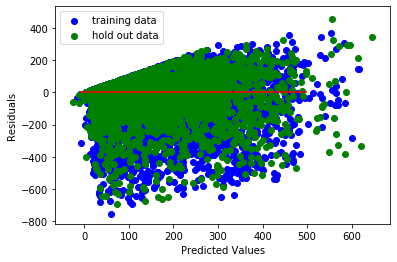

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(gs2.predict(X1_scaled_train),error_train, c="b", label="training data")
plt.scatter(gs2.predict(X1_scaled_test),error_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=500, color="r")
plt.show()

In [29]:
error_train = np.array(error_train).reshape(-1,1)
scaled_error_train= StandardScaler(copy=False).fit(error_train).transform(error_train).flatten()

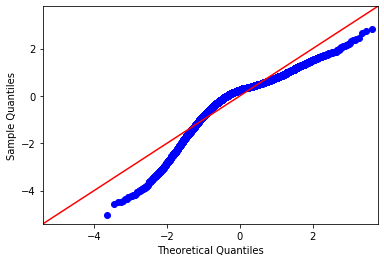

In [30]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(scaled_error_train,line='45')
plt.show()

In [31]:
# Kolmogorov-Smirnov Test
from scipy import stats
print(stats.kstest(scaled_error_train, 'norm'))

# D’Agostino Test
print(stats.normaltest(scaled_error_train))

KstestResult(statistic=0.1405731028270909, pvalue=1.0916467244857649e-125)
NormaltestResult(statistic=1785.4257219889573, pvalue=0.0)
